In [53]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# drift coefficent
mu1 = -0.5
mu2 = 1
# number of steps
n = 100000
# time in years
T = 1
# number of sims
M = 1
# initial stock price
S0 = 15
# volatility
sigma1 = 0.15
sigma2 = 0.5

In [54]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St1 = np.exp(
    (mu1 - sigma1 ** 2 / 2) * dt + sigma1 * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
St2 = np.exp(
    (mu1 - sigma2 ** 2 / 2) * dt + sigma2 * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
St3 = np.exp(
    (mu2 - sigma1 ** 2 / 2) * dt + sigma1 * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
St4 = np.exp(
    (mu2 - sigma2 ** 2 / 2) * dt + sigma2 * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St1 = np.vstack([np.ones(M), St1])
St2 = np.vstack([np.ones(M), St2])
St3 = np.vstack([np.ones(M), St3])
St4 = np.vstack([np.ones(M), St4])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St1 = S0 * St1.cumprod(axis=0)
St2 = S0 * St2.cumprod(axis=0)
St3 = S0 * St3.cumprod(axis=0)
St4 = S0 * St4.cumprod(axis=0)

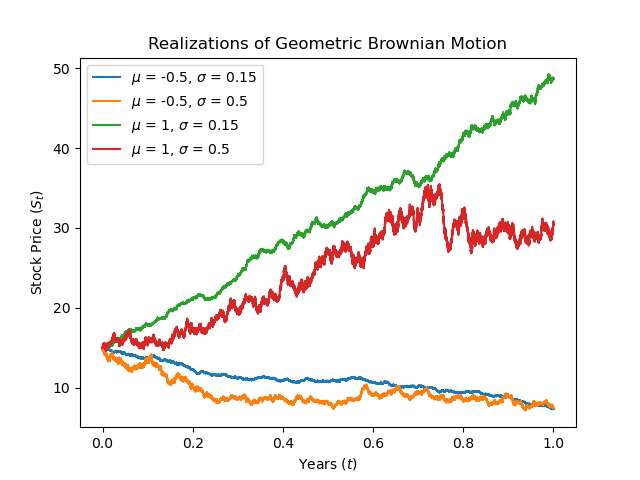

In [55]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

plt.figure()
plt.plot(tt, St1, label=f'$\mu$ = {mu1}, $\sigma$ = {sigma1}')
plt.plot(tt, St2, label=f'$\mu$ = {mu1}, $\sigma$ = {sigma2}')
plt.plot(tt, St3, label=f'$\mu$ = {mu2}, $\sigma$ = {sigma1}')
plt.plot(tt, St4, label=f'$\mu$ = {mu2}, $\sigma$ = {sigma2}')
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.legend()
plt.title(
    "Realizations of Geometric Brownian Motion"
)
plt.show()